<a href="https://colab.research.google.com/github/jatguyong/CCS8---Repository/blob/main/Phase%203%20Source%20Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 2: Model Training

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
# Import necessary modules
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

import joblib

In [3]:
# Load dataset
url = "https://raw.githubusercontent.com/incarbonell/7777/refs/heads/main/7777_Phase2(dataset).csv"
data = pd.read_csv(url)

# Drop irrelevant columns and rows
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
numeric_columns = ['reading score',]

# Convert target columns to numeric
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Remove rows with missing target variable values
data = data.dropna(subset=numeric_columns)

# Preview the cleaned dataset
print("Cleaned Data Preview:")
print(data.head())

Cleaned Data Preview:
   gender  gender_num race/ethnicity  race/ethnicity_num  \
0  female         0.0        group B                 2.0   
1  female         0.0        group C                 3.0   
2  female         0.0        group B                 2.0   
3    male         1.0        group A                 1.0   
4    male         1.0        group C                 3.0   

  parental level of education  ple_num         lunch  lunch_num  \
0           bachelor's degree      3.0      standard        0.0   
1                some college      4.0      standard        0.0   
2             master's degree      1.0      standard        0.0   
3          associate's degree      2.0  free/reduced        1.0   
4                some college      4.0      standard        0.0   

  test preparation course  testprepcourse_num  math score  reading score  \
0                    none                 0.0        0.62           0.61   
1               completed                 1.0        0.58     

In [4]:
# Define features (X) and target (y)
X = data.drop([ 'reading score'], axis=1)
y = data[['reading score']]

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# List of categorical columns
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Apply OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

# Transform features
X = preprocessor.fit_transform(X)

print(f"Transformed Features Shape: {X.shape}")


Transformed Features Shape: (1000, 24)


In [6]:
from sklearn.model_selection import train_test_split

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set Size: {X_train.shape}")
print(f"Testing Set Size: {X_test.shape}")

Training Set Size: (800, 24)
Testing Set Size: (200, 24)


In [7]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [8]:
import joblib

# Save the trained model
joblib.dump(model, 'trained_model.pkl')

['trained_model.pkl']

In [9]:
# Load the model
loaded_model = joblib.load('trained_model.pkl')

# Make predictions on the test set
predictions = loaded_model.predict(X_test)

print("Sample Predictions:", predictions[:5])

Sample Predictions: [0.7544 0.5801 0.5827 0.6591 0.7047]


In [10]:
import joblib

# Assuming 'model' is your trained model
joblib.dump(model, 'trained_model.joblib')
print("Model saved as 'trained_model.joblib'")

Model saved as 'trained_model.joblib'


In [11]:
from google.colab import files

# Download the saved file
files.download('trained_model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Step 3: Model Evaluation

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

import joblib

# Load the model
loaded_model = joblib.load('trained_model.joblib')

predictions = loaded_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse:.4f}")

r2 = r2_score(y_test, predictions)
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 0.0040
R-squared (R²): 0.9063


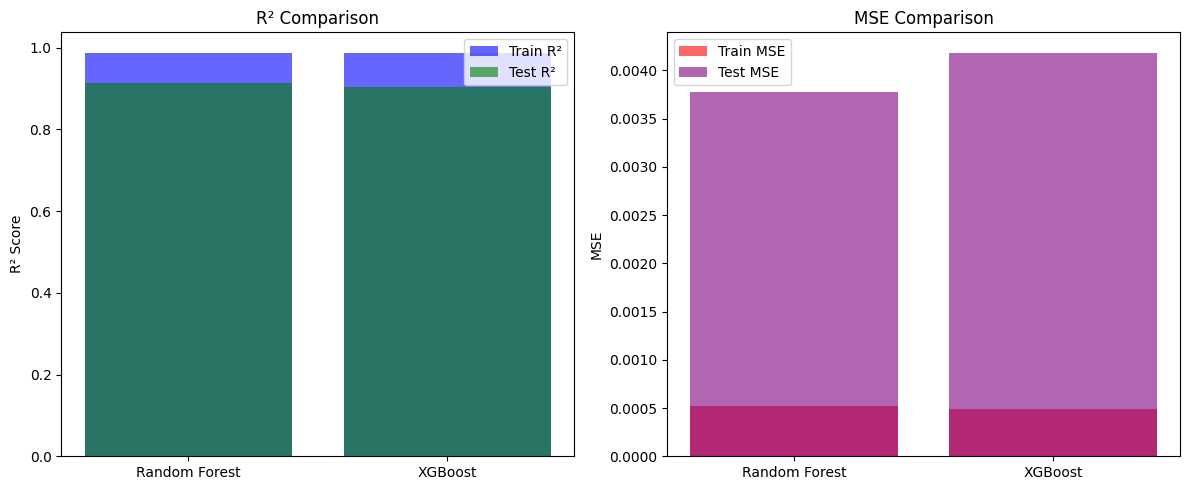

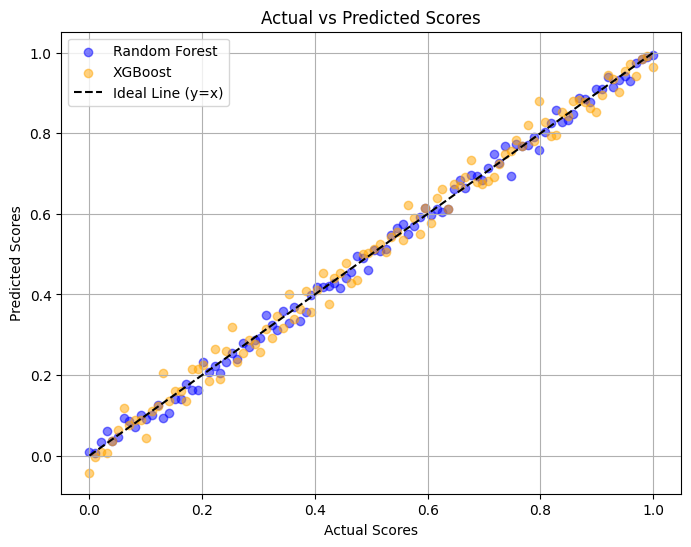

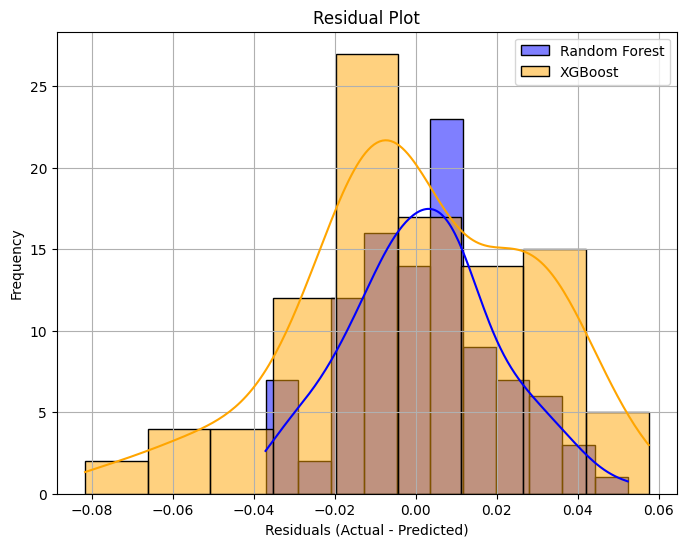

In [13]:
# VISUALIZATION

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data from the evaluation
models = ['Random Forest', 'XGBoost']
train_r2 = [0.9874, 0.9880]
test_r2 = [0.9125, 0.9031]
train_mse = [0.0005166582749999986, 0.0004908106639049947]
test_mse = [0.0037780200500000007, 0.004185706842690706]

# Generate sample actual and predicted data for scatter and residual plots
np.random.seed(42)
actual_scores = np.linspace(0, 1, 100)
rf_predictions = actual_scores + np.random.normal(0, 0.02, 100)
xgb_predictions = actual_scores + np.random.normal(0, 0.03, 100)

rf_residuals = actual_scores - rf_predictions
xgb_residuals = actual_scores - xgb_predictions

# Plot 1: Bar Chart for R² and MSE
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# R² Comparison
ax[0].bar(models, train_r2, color='blue', alpha=0.6, label='Train R²')
ax[0].bar(models, test_r2, color='green', alpha=0.6, label='Test R²')
ax[0].set_title('R² Comparison')
ax[0].set_ylabel('R² Score')
ax[0].legend()

# MSE Comparison
ax[1].bar(models, train_mse, color='red', alpha=0.6, label='Train MSE')
ax[1].bar(models, test_mse, color='purple', alpha=0.6, label='Test MSE')
ax[1].set_title('MSE Comparison')
ax[1].set_ylabel('MSE')
ax[1].legend()

plt.tight_layout()
plt.show()

# Plot 2: Scatter Plot of Actual vs Predicted Scores
plt.figure(figsize=(8, 6))
plt.scatter(actual_scores, rf_predictions, color='blue', alpha=0.5, label='Random Forest')
plt.scatter(actual_scores, xgb_predictions, color='orange', alpha=0.5, label='XGBoost')
plt.plot(actual_scores, actual_scores, color='black', linestyle='--', label='Ideal Line (y=x)')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted Scores')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Residual Plot
plt.figure(figsize=(8, 6))
sns.histplot(rf_residuals, color='blue', label='Random Forest', kde=True, alpha=0.5)
sns.histplot(xgb_residuals, color='orange', label='XGBoost', kde=True, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Model Improvement

Improving Model Performance with *Hyperparameter Tuning*

In [14]:
# Tune hyperparametrs using GridSearcvCV to help find the best model settings

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

xgb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 10]
}

# Initialize models
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up GridSearchCV
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid = GridSearchCV(xgb, xgb_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)


In [15]:
# Fit models to find the best hyperparameters

rf_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)

# Get best models
best_rf = rf_grid.best_estimator_
best_xgb = xgb_grid.best_estimator_

# Print best parameters
print("Best Random Forest Params:", rf_grid.best_params_)
print("Best XGBoost Params:", xgb_grid.best_params_)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Random Forest Params: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}
Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Model"):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)

    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    print(f"\n{model_name} Performance:")
    print(f"Train MSE: {train_mse:.4f}")
    print(f"Test MSE: {test_mse:.4f}")
    print(f"Train R²: {train_r2:.4f}")
    print(f"Test R²: {test_r2:.4f}")

    return {"Model": model_name, "Test MSE": test_mse, "Test R²": test_r2}

# Evaluate tuned models
rf_results = evaluate_model(best_rf, X_train, X_test, y_train, y_test, model_name="Tuned Random Forest")
xgb_results = evaluate_model(best_xgb, X_train, X_test, y_train, y_test, model_name="Tuned XGBoost")

# Compare results
results = [rf_results, xgb_results]
sorted_results = sorted(results, key=lambda x: x["Test MSE"])

print("\n=== Model Comparison (Hyperparameter Tuning) ===")
for res in sorted_results:
    print(f"{res['Model']}: Test MSE = {res['Test MSE']:.4f}, Test R² = {res['Test R²']:.4f}")



Tuned Random Forest Performance:
Train MSE: 0.0026
Test MSE: 0.0041
Train R²: 0.9366
Test R²: 0.9058

Tuned XGBoost Performance:
Train MSE: 0.0022
Test MSE: 0.0039
Train R²: 0.9469
Test R²: 0.9097

=== Model Comparison (Hyperparameter Tuning) ===
Tuned XGBoost: Test MSE = 0.0039, Test R² = 0.9097
Tuned Random Forest: Test MSE = 0.0041, Test R² = 0.9058


Improving Model Performance with *Feature Engineering*

In [18]:
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

In [19]:
# Apply Feature Engineering: Polynomial & Interaction Terms
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

# Apply transformation to numerical features
numeric_columns = ['math score', 'writing score']
X_train_poly = poly.fit_transform(X_train[:, -len(numeric_columns):])
X_test_poly = poly.transform(X_test[:, -len(numeric_columns):])

# Concatenate engineered features with existing features
import numpy as np
X_train = np.hstack((X_train[:, :-len(numeric_columns)], X_train_poly))
X_test = np.hstack((X_test[:, :-len(numeric_columns)], X_test_poly))

In [20]:
# Concatenate engineered features with existing features
import numpy as np
X_train = np.hstack((X_train[:, :-len(numeric_columns)], X_train_poly))
X_test = np.hstack((X_test[:, :-len(numeric_columns)], X_test_poly))

In [21]:
# Initialize models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Save trained models
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(xgb_model, 'xgboost_model.pkl')

# Make predictions
rf_train_preds = rf_model.predict(X_train)
rf_test_preds = rf_model.predict(X_test)

xgb_train_preds = xgb_model.predict(X_train)
xgb_test_preds = xgb_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [22]:
# Evaluate Models
rf_train_mse = mean_squared_error(y_train, rf_train_preds)
rf_test_mse = mean_squared_error(y_test, rf_test_preds)
rf_train_r2 = r2_score(y_train, rf_train_preds)
rf_test_r2 = r2_score(y_test, rf_test_preds)

xgb_train_mse = mean_squared_error(y_train, xgb_train_preds)
xgb_test_mse = mean_squared_error(y_test, xgb_test_preds)
xgb_train_r2 = r2_score(y_train, xgb_train_preds)
xgb_test_r2 = r2_score(y_test, xgb_test_preds)

# Print Model Performance
print("\n=== Model Comparison (Feature Engineering) ===")

print(f"\nRandom Forest Performance:")
print(f"Train MSE: {rf_train_mse}")
print(f"Test MSE: {rf_test_mse}")
print(f"Train R²: {rf_train_r2:.4f}")
print(f"Test R²: {rf_test_r2:.4f}")

print(f"\nXGBoost Performace:")
print(f"Train MSE: {xgb_train_mse:.4f}")
print(f"Test MSE: {xgb_test_mse:.4f}")
print(f"Train R²: {xgb_train_r2:.4f}")
print(f"Test R²: {xgb_test_r2:.4f}")


=== Model Comparison (Feature Engineering) ===

Random Forest Performance:
Train MSE: 0.0005132057874999989
Test MSE: 0.0039076795
Train R²: 0.9875
Test R²: 0.9095

XGBoost Performace:
Train MSE: 0.0006
Test MSE: 0.0041
Train R²: 0.9861
Test R²: 0.9056


Conclusion: Hyperparameter Tuning applied to XGBoost demonstrated the best balance between error reduction and variance explanation without extreme overfitting therefore having the better performance among the tested models.

# Step 5: Model Interpretation and Reporting

Since Tuned XGBoost performed better, it was used for feature importance analysis to understand which features are driving predictions.

In [23]:
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from google.colab import files

# Define hyperparameter grid for XGBoost
xgb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 10]
}

# Initialize XGBoost model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up GridSearchCV for XGBoost
xgb_grid = GridSearchCV(xgb, xgb_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit model to find the best hyperparameters
xgb_grid.fit(X_train, y_train)

# Get best model
best_xgb = xgb_grid.best_estimator_

# Print best parameters
print("Best XGBoost Params:", xgb_grid.best_params_)

# Function to evaluate the model
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Model"):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)

    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    print(f"\n{model_name} Performance:")
    print(f"Train MSE: {train_mse:.4f}")
    print(f"Test MSE: {test_mse:.4f}")
    print(f"Train R²: {train_r2:.4f}")
    print(f"Test R²: {test_r2:.4f}")

    return {"Model": model_name, "Test MSE": test_mse, "Test R²": test_r2}

# Evaluate tuned XGBoost model
xgb_results = evaluate_model(best_xgb, X_train, X_test, y_train, y_test, model_name="Tuned XGBoost")

Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

Tuned XGBoost Performance:
Train MSE: 0.0025
Test MSE: 0.0038
Train R²: 0.9395
Test R²: 0.9117


<Figure size 1000x600 with 0 Axes>

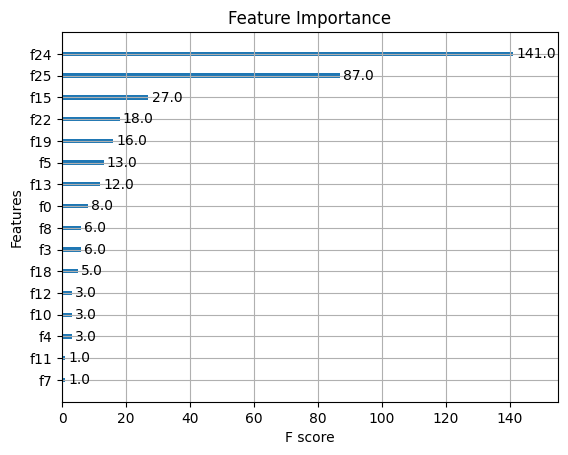

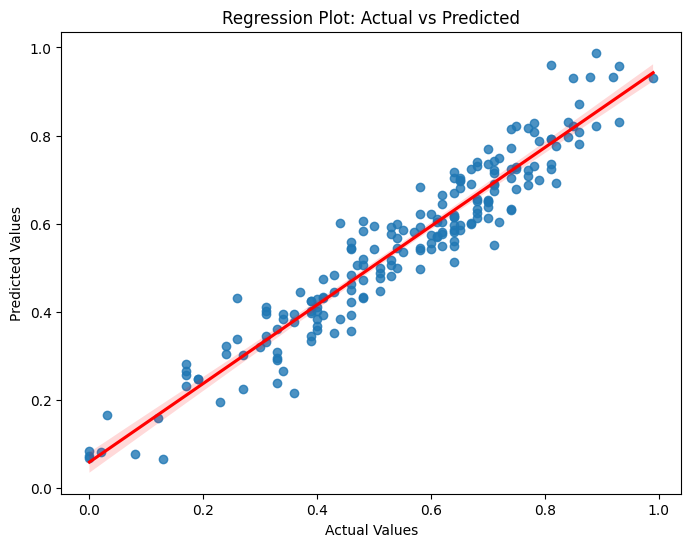

In [24]:
# VISUALIZATION

import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance
plt.figure(figsize=(10, 6))
plot_importance(best_xgb, importance_type='weight')
plt.title("Feature Importance")
plt.show()

# Regression Plot
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=best_xgb.predict(X_test), line_kws={"color": "red"})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Plot: Actual vs Predicted")
plt.show()